### Potential Energy/ Potential Function and MALA

Potential Energy - $U(\theta)$ \
Potential Function - $p(\theta)$ 

Define, 

$U(\theta) = -log(p(\theta))$

So,

p($\theta$) = $e^{-U(\theta)}$



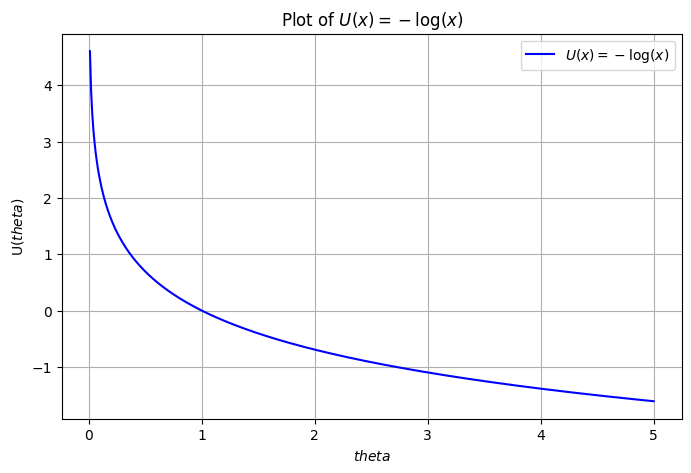

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values (must be > 0 since log(0) is undefined)
x = np.linspace(0.01, 5, 500)
y = -np.log(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, label=r'$U(x) = -\log(x)$', color='blue')
plt.title('Plot of $U(x) = -\log(x)$')
plt.xlabel('$theta$')
plt.ylabel('U($theta$)')
plt.grid(True)
plt.legend()
plt.show()



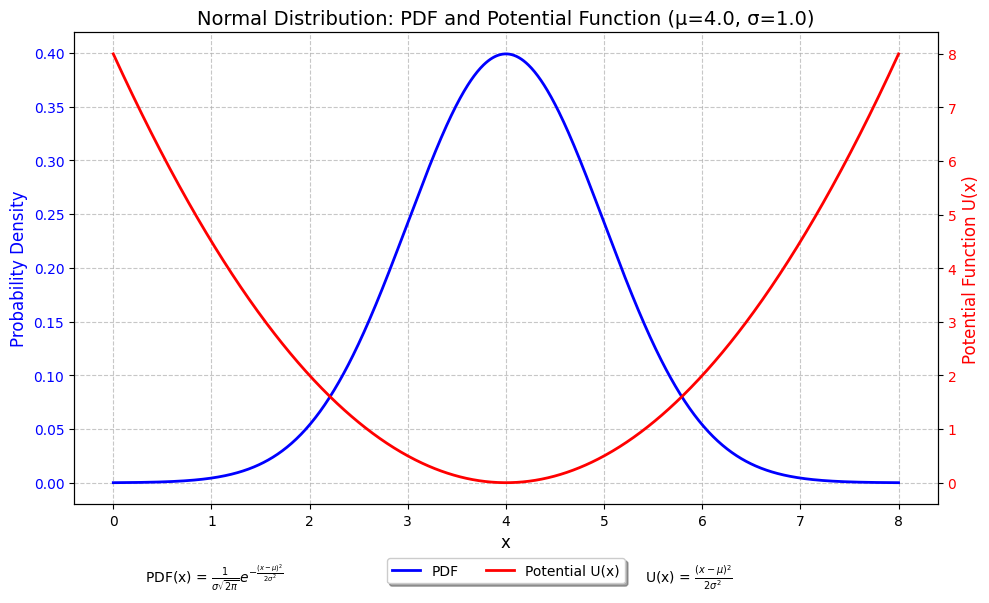

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def normal_pdf(x, mu, sigma):
    """Calculate the normal probability density function."""
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

def potential_function(x, mu, sigma):
    """Calculate the potential function U(x) = (x-μ)²/(2σ²)."""
    return ((x - mu) ** 2) / (2 * sigma ** 2)

# Fixed parameters
mu = 4.0  # Mean
sigma = 1.0  # Standard deviation

# Generate x values
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 1000)

# Calculate PDF and potential function
pdf_values = normal_pdf(x, mu, sigma)
potential_values = potential_function(x, mu, sigma)

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PDF on the left y-axis
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Probability Density', color='blue', fontsize=12)
ax1.plot(x, pdf_values, 'b-', linewidth=2, label='PDF')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the potential function
ax2 = ax1.twinx()
ax2.set_ylabel('Potential Function U(x)', color='red', fontsize=12)
ax2.plot(x, potential_values, 'r-', linewidth=2, label='Potential U(x)')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title(f'Normal Distribution: PDF and Potential Function (μ={mu}, σ={sigma})', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fancybox=True, shadow=True)

# Add formula annotations
plt.figtext(0.15, 0.02, r'PDF(x) = $\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$', fontsize=10)
plt.figtext(0.65, 0.02, r'U(x) = $\frac{(x-\mu)^2}{2\sigma^2}$', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for formula annotations
plt.savefig('normal_distribution_potential.png', dpi=300, bbox_inches='tight')
plt.show()

Potential function is the negative of the probability density function. In above equation, we have defined the potential energy function as the negative of the probability density function. While doing that we have dropped the constant term. The constant term is not important in the context of MALA.

In optimization and machine learning contexts, we go against (opposite direction of) the gradient of the potential function because. Seeking minimum energy: The potential function U(x) represents an "energy landscape" where lower values are more favorable states (higher probability regions in a distribution). The gradient points in the direction of steepest increase, so moving against it leads us to lower energy states.




Assignment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

In [79]:
def target_function(x): # PDF in our case
    return -x**2 * (x**2 - 1)

In [80]:
x = np.linspace(-1.1, 1.1, 1000)
y = target_function(x)

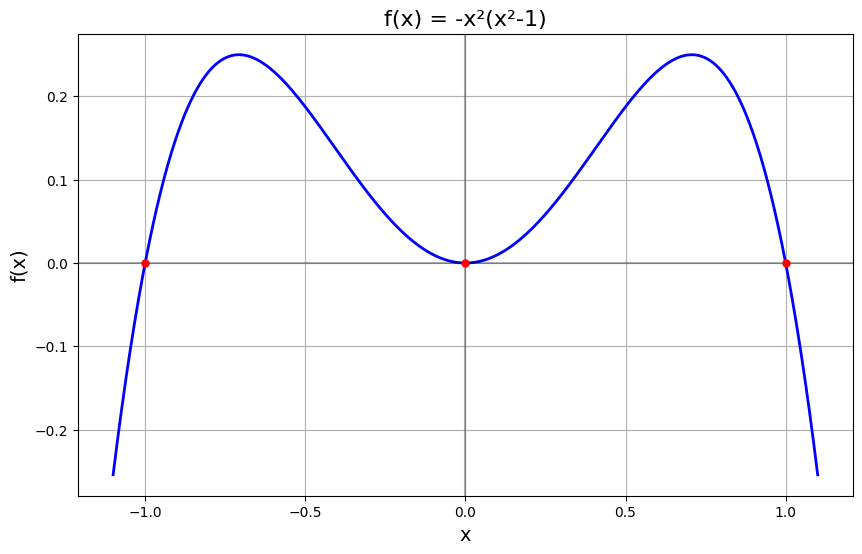

In [81]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2)
plt.grid(True)
plt.title('f(x) = -x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()

/var/folders/j3/904q7dbj02j_jyjz7pvfgz384d40kw/T/ipykernel_24273/2881675553.py:5: RuntimeWarning: invalid value encountered in log
  return -np.log(target_function(x))


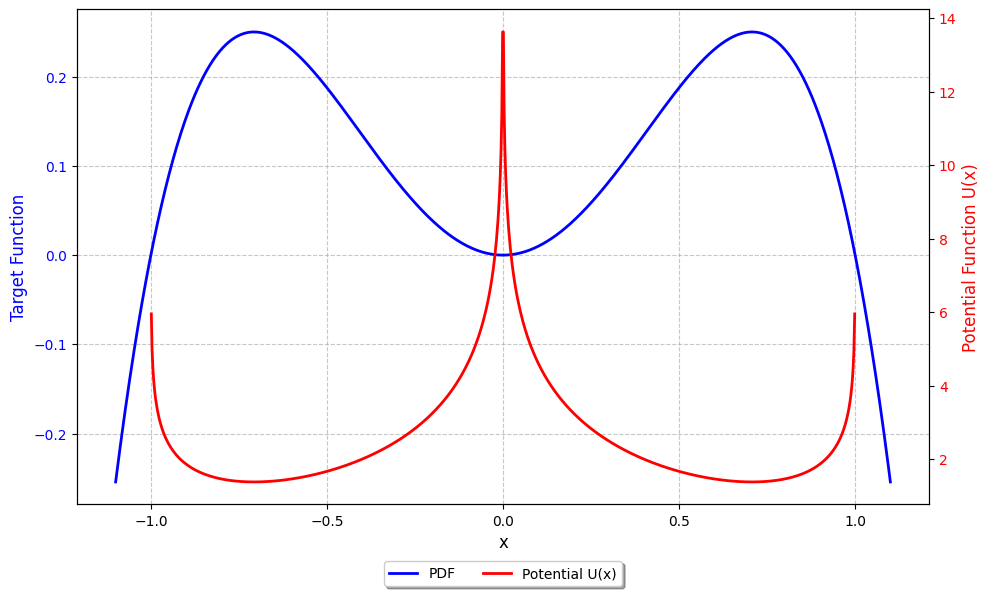

In [109]:
def target_function(x): # PDF in our case
    return -x**2 * (x**2 - 1)

def potential_function(x): # Potential function
    return -np.log(target_function(x))

# Calculate PDF and potential function
x = np.linspace(-1.1, 1.1, 1000)
y = target_function(x)
potential_values = potential_function(x)

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PDF on the left y-axis
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Target Function', color='blue', fontsize=12)
ax1.plot(x, y, 'b-', linewidth=2, label='PDF')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the potential function
ax2 = ax1.twinx()
ax2.set_ylabel('Potential Function U(x)', color='red', fontsize=12)
ax2.plot(x, potential_values, 'r-', linewidth=2, label='Potential U(x)')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
# plt.title(f'Normal Distribution: PDF and Potential Function (μ={mu}, σ={sigma})', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fancybox=True, shadow=True)

# Add formula annotations
# plt.figtext(0.15, 0.02, r'PDF(x) = $\frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$', fontsize=10)
# plt.figtext(0.65, 0.02, r'U(x) = $\frac{(x-\mu)^2}{2\sigma^2}$', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for formula annotations
# plt.savefig('normal_distribution_potential.png', dpi=300, bbox_inches='tight')
plt.show()

Metropolis Hasting 

In [ ]:
# Metropolis-Hastings with non-symmetric proposal
def metropolis_hastings(iter, initial_x, proposal_type="symmetric", proposal_width=0.5):

    # our function is not a probability density function
    # but we can use it as a target function
    def target_function(x): # PDF in our case
        return  -(x**2 * (x**2 - 1))
    
    # Initialize
    burn_in = 1000
    iterations = iter + burn_in

    # Store samples
    samples = np.zeros(iterations)
    current_x = initial_x
    samples[0] = current_x

    # Acceptance counter
    accepted = 0

    for i in range(1, iterations):

        # Propose a new sample
        if proposal_type == "symmetric":
            # Symmetric proposal : Gaussian centered at current_x
            # with standard deviation proposal_width
            proposed_x = current_x + np.random.normal(0, proposal_width)

            # For symmetric proposals, q(x'|x) = q(x|x'), so the ratio is 1
            # in here q should be gaussian density
            proposal_ratio = 1.0

        elif proposal_type == "asymmetric":

            # Asymmetric proposal: Skewed distribution
            # Here we'll use an exponential proposal distribution
            # When moving right: sample from exponential distribution
            # When moving left: sample from negative exponential distribution
            direction = np.random.choice([-1, 1])
            if direction > 0:
                # Moving right: propose a positive step with exponential distribution
                step = np.random.exponential(proposal_width)
                proposed_x = current_x + step
                
                # Calculate q(x|x')/q(x'|x)
                # q(x'|x) is exponential density of step
                q_forward = (1/proposal_width) * np.exp(-step/proposal_width)
                
                # q(x|x') would be negative exponential (moving left from proposed_x to current_x)
                reverse_step = proposed_x - current_x  # Same as 'step'
                q_reverse = (1/proposal_width) * np.exp(-reverse_step/proposal_width)
                
            else:
                # Moving left: propose a negative step with exponential distribution
                step = np.random.exponential(proposal_width)
                proposed_x = current_x - step
                
                # Calculate q(x|x')/q(x'|x)
                # q(x'|x) is negative exponential density of step
                q_forward = (1/proposal_width) * np.exp(-step/proposal_width)
                
                # q(x|x') would be positive exponential (moving right from proposed_x to current_x)
                reverse_step = current_x - proposed_x  # Same as 'step'
                q_reverse = (1/proposal_width) * np.exp(-reverse_step/proposal_width)
            
            # Hastings correction: ratio of proposal densities
            proposal_ratio = q_reverse / q_forward


        else:
            raise ValueError("Invalid proposal type. Use 'symmetric' or 'asymmetric'.")
        

        # Calculate acceptance probability with Hastings correction
        current_density = target_function(current_x)
        proposed_density = target_function(proposed_x)

        # The full Metropolis-Hastings acceptance probability
        if current_density == 0:
            acceptance_prob = 1.0
        else:
            acceptance_prob = min(1.0, (proposed_density / current_density) * proposal_ratio)

        # Accept or reject the proposal
        if np.random.uniform(0, 1) < acceptance_prob:
            current_x = proposed_x
            accepted += 1
            
        samples[i] = current_x

    acceptance_rate = accepted / (iterations-burn_in)
    print(f"Acceptance rate: {acceptance_rate:.2f}")

    # Discard burn-in samples
    samples = samples[burn_in:]

    return samples

Symmetric proposal distribution

In [99]:
samples = metropolis_hastings(10000, initial_x=0.5, proposal_type="symmetric", proposal_width=0.5)

Acceptance rate: 0.53


In [100]:
def target_function(x): # PDF in our case
    return  -(x**2 * (x**2 - 1))

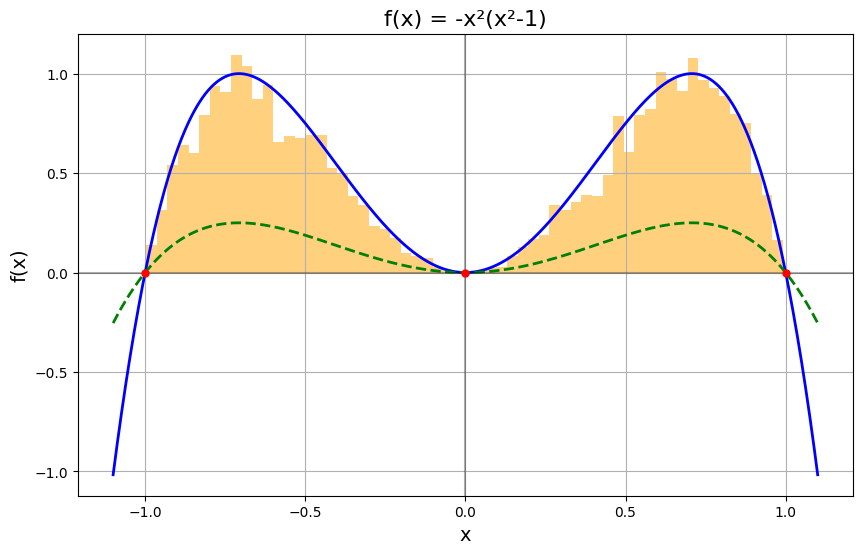

In [102]:
x = np.linspace(-1.1, 1.1, 1000)
y_unnormalized = target_function(x)

y = y_unnormalized / np.max(y_unnormalized)  # Normalize the target function for plotting


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Normalized PDF')
plt.plot(x, y_unnormalized, 'g--', lw=2, label='Unnormalized PDF')
plt.hist(samples, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
plt.grid(True)
plt.title('f(x) = -x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()



Asymmetric proposal distribution

In [105]:
samples_asymmetric = metropolis_hastings(10000, initial_x=0.5, proposal_type="asymmetric", proposal_width=0.5)

Acceptance rate: 0.53


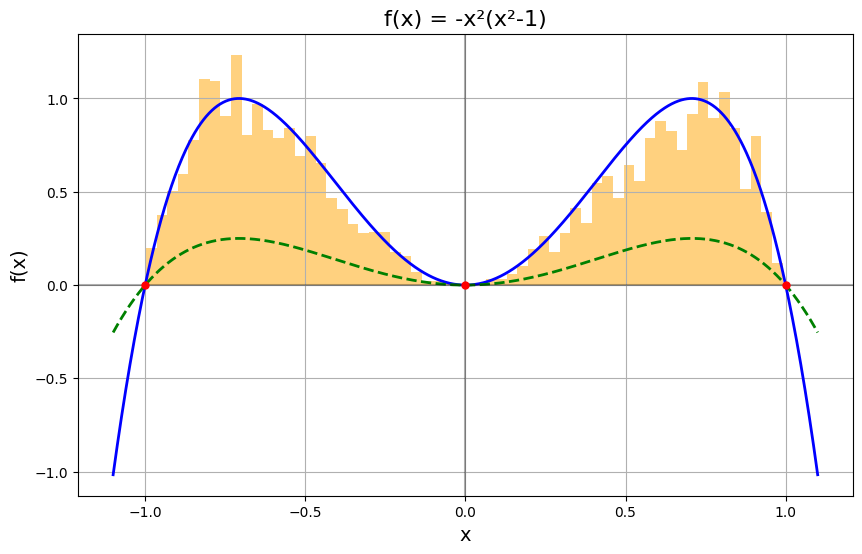

In [106]:
x = np.linspace(-1.1, 1.1, 1000)
y_unnormalized = target_function(x)

y = y_unnormalized / np.max(y_unnormalized)  # Normalize the target function for plotting


plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label='Normalized PDF')
plt.plot(x, y_unnormalized, 'g--', lw=2, label='Unnormalized PDF')
plt.hist(samples_asymmetric, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
plt.grid(True)
plt.title('f(x) = -x²(x²-1)', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('f(x)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Mark the roots and critical points
roots = [0, -1, 1]
for root in roots:
    plt.plot(root, 0, 'ro', ms=5)

plt.show()

In [ ]:
# Metropolis-Hastings with non-symmetric proposal
def metropolis_hastings(iter, initial_x, proposal_type="symmetric", proposal_width=0.5):

    # our function is not a probability density function
    # but we can use it as a target function
    def target_function(x):
        val = -x**2 * (x**2 - 1)
        return val
    
    

    np.random.seed(42)

    burn_in = 1000
    iterations = iter + burn_in

    # Store samples
    samples = np.zeros(iterations)
    current_x = initial_x
    accepted = 0

    for i in range(iterations):

        proposed_x = current_x + np.random.normal(0, proposal_width)

        # Calculate acceptance ratio
        p_current = target_function(current_x)  # we have the target function no need to complecate
        p_proposed = target_function(proposed_x)

        q_current_given_proposed = proposal_density(current_x, proposed_x)
        q_proposed_given_current = proposal_density(proposed_x, current_x)

        print(q_current_given_proposed, q_proposed_given_current)

        # Calculate acceptance ratio
        acceptance_ratio = (p_proposed * q_current_given_proposed) / (p_current * q_proposed_given_current)
        acceptance_ratio = min(1, acceptance_ratio)

        # Accept or reject the proposed sample
        if np.random.rand() < acceptance_ratio:
            current_x = proposed_x
            accepted += 1
        samples[i] = current_x

    # Discard burn-in samples
    samples = samples[burn_in:]

    # Acceptance rate
    acceptance_rate = accepted / iterations

    

    return samples, acceptance_rate

In [ ]:
# Define target function (unnormalized density)


In [48]:
def proposal_density(x_given, proposal_width):
    return np.random.normal(x_given, proposal_width)

In [50]:
# run the Metropolis-Hastings algorithm
np.random.seed(42)
iterations = 100000
initial_x = 0.5
samples, acceptance_rate = metropolis_hastings(iterations, initial_x)

0.4102644988400272 0.972858514953716
0.9576124854939896 1.761762018368314
0.9247280304600056 0.20740724568392455
-0.45442960183665604 0.8514041998857138
0.5723797602834199 -0.25710975303310424
0.45499336942934276 0.38822558306722843


ValueError: scale < 0

In [45]:
acceptance_rate

0.6490594059405941

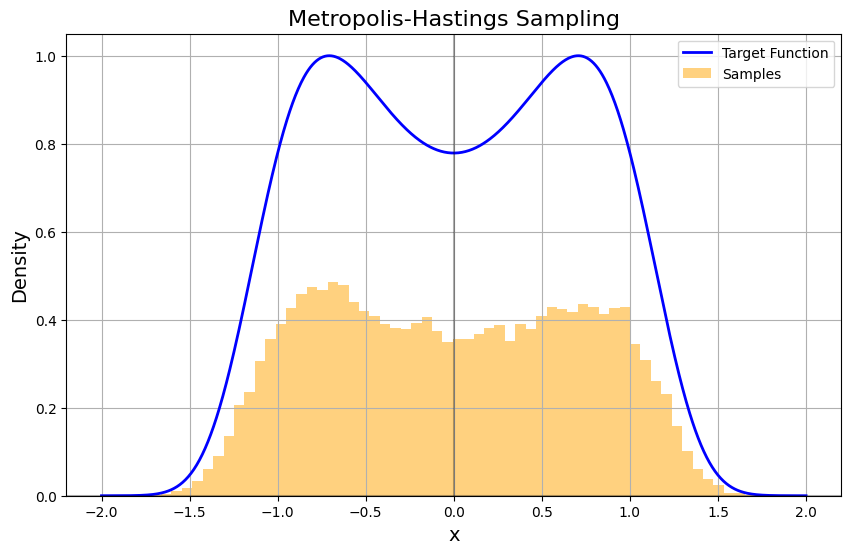

In [40]:
# plot the samples with the target function

x_values = np.linspace(-2, 2, 1000)
y_values = target_function(x_values)
y_values /= np.max(y_values)  # Normalize for plotting

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'b-', lw=2, label='Target Function')
plt.hist(samples, bins=60, density=True, alpha=0.5, color='orange', label='Samples')
# plt.hist(samples, bins=50, density=True, alpha=0.5, label='Samples')
plt.title('Metropolis-Hastings Sampling', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# potential function in MCMC
def potential_function(x):
    """Calculate the potential function U(x) = -log(f(x))."""
    return -np.log(-x**2 * (x**2 - 1))

In [ ]:
# Calculate PDF and potential function
pdf_values = target_function(x)
potential_values = potential_function(x)

# Create figure with two y-axes
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot PDF on the left y-axis
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('Probability Density', color='blue', fontsize=12)
ax1.plot(x, pdf_values, 'b-', linewidth=2, label='PDF')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the potential function
ax2 = ax1.twinx()
ax2.set_ylabel('Potential Function U(x)', color='red', fontsize=12)
ax2.plot(x, potential_values, 'r-', linewidth=2, label='Potential U(x)')
ax2.tick_params(axis='y', labelcolor='red')

# Add title and grid
plt.title(f'Normal Distribution: PDF and Potential Function (μ={mu}, σ={sigma})', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.7)

# Add legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper center', bbox_to_anchor=(0.5, -0.1), 
           ncol=2, fancybox=True, shadow=True)

# Add formula annotations
plt.figtext(0.15, 0.02, r'PDF(x) = $x^2(x^2 - 1)$', fontsize=10)
plt.figtext(0.65, 0.02, r'U(x) = $-\log(x^2(x^2 - 1))$', fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for formula annotations
plt.savefig('normal_distribution_potential.png', dpi=300, bbox_inches='tight')
plt.show()

MALA code

In [ ]:
x = np.linspace(-0.99, 0.99, 1000)


In [ ]:
def mala(iterations, step_size, initial_position):
    """Perform MALA sampling."""
    
    
    # def potential_function(x):
    #     return -np.log(-x**2 * (x**2 - 1))
    
    # def gradient_of_potential(x):
    #     """Gradient of the potential function."""
    #     return -4 * x**3 + 2 * x
    
    def potential_function(x):
        return -np.log(-x**2 * (x**2 - 1) + 1e-8)  # for numerical stability

    def gradient_of_potential(x):
        grad = -4 * x**3 + 2 * x
        return np.clip(grad, -1e3, 1e3)  # gradient clipping to prevent explosion

    
    #  propose distribution
    def proposal_distribution(x, step_size):
        return np.random.normal(x, step_size)
    
    # initialize array to store samples
    samples = np.zeros(iterations)

    # set initial position
    current_x = initial_position

    # store the initial sample
    samples[0] = current_x

    # count accepted samples
    accepted_samples = 0

    for i in range(1, iterations):

        # calculate current potential and gradient
        current_potential = potential_function(current_x)
        current_gradient = gradient_of_potential(current_x)

        # propose a new position based on the Langevin dynamics
        proposed_x = current_x - step_size**2 * current_gradient + step_size * np.random.normal()

        # calculate the acceptance ratio
        alpha = min(1, (potential_function(proposed_x)*proposal_distribution(proposed_x, step_size))/(potential_function(current_x)*proposal_distribution(current_x, step_size)))


        # Accept or reject the proposal
        if np.random.uniform() < alpha:
            current_x = proposed_x
            accepted_samples += 1

        # Store the sample
        samples[i] = current_x

    # Calculate acceptance rate
    acceptance_rate = accepted_samples / iterations

    return samples, acceptance_rate

In [ ]:
samples = mala(iterations=1000, step_size=0.1, initial_position=0.5)

In [ ]:
samples = np.array(samples)

In [ ]:
# clip the samples to the range of the target function
samples_clipped = np.clip(samples, -1, 1)

In [ ]:
# plot the density function and samples
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib.cm as cm

y = target_function(x)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Target Density (normalized)', color='blue')
# plt.hist(samples, bins=40, density=True, alpha=0.6, label='Sample Density')
plt.title('Target Density and MALA Sample Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# plot histogram of mala samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=40, density=True, alpha=0.6, label='MALA Samples')
plt.title('Histogram of MALA Samples')
plt.xlabel('x')
plt.ylabel('Density')
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Define our target function f(x) = x^2
def target_function(x):
    return x**2

# Metropolis-Hastings algorithm
def metropolis_hastings(iterations, proposal_width, initial_x):
    """
    Metropolis-Hastings algorithm for sampling from a distribution proportional to e^(-f(x))
    where f(x) = x^2 in this case.
    
    Parameters:
    - iterations: Number of samples to generate
    - proposal_width: Standard deviation of the Gaussian proposal distribution
    - initial_x: Starting point for the Markov chain
    
    Returns:
    - samples: Array of accepted samples
    """
    # Initialize array to store samples
    samples = np.zeros(iterations)
    
    # Set the initial state
    current_x = initial_x
    current_fx = target_function(current_x)
    
    # Store the initial state
    samples[0] = current_x
    
    # Counter for accepted proposals
    accepted = 0
    
    # Run the MCMC algorithm
    for i in range(1, iterations):
        # Generate a proposal
        proposed_x = current_x + np.random.normal(0, proposal_width)
        proposed_fx = target_function(proposed_x)
        
        # Calculate the acceptance ratio
        # For target distribution prop to e^(-f(x))
        acceptance_ratio = np.exp(-(proposed_fx - current_fx))
        
        # Accept or reject the proposal
        if np.random.random() < acceptance_ratio:
            current_x = proposed_x
            current_fx = proposed_fx
            accepted += 1
            
        # Store the sample
        samples[i] = current_x
    
    acceptance_rate = accepted / (iterations - 1)
    print(f"Acceptance rate: {acceptance_rate:.4f}")
    
    return samples

# Plot the function f(x) = x^2
def plot_function():
    x = np.linspace(-5, 5, 1000)
    y = target_function(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'b-', lw=2)
    plt.grid(True)
    plt.title('f(x) = x²', fontsize=16)
    plt.xlabel('x', fontsize=14)
    plt.ylabel('f(x)', fontsize=14)
    plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
    plt.savefig('function_plot.png')
    plt.show()

# Run the algorithm and plot results
def run_and_visualize():
    # First plot the function
    plot_function()
    
    # Now run Metropolis-Hastings
    iterations = 100000
    proposal_width = 0.5
    initial_x = 0.0
    
    samples = metropolis_hastings(iterations, proposal_width, initial_x)
    
    # Plot histogram of samples (represents the distribution proportional to e^(-x²))
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    sns.histplot(samples, kde=True, stat="density")
    plt.title('Distribution of Samples: p(x) ∝ e^(-x²)', fontsize=14)
    plt.xlabel('x', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    
    # Plot the trace of the Markov chain
    plt.subplot(1, 2, 2)
    plt.plot(samples[:1000], 'b-', alpha=0.6)
    plt.title('Trace of First 1000 Samples', fontsize=14)
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('x', fontsize=12)
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('metropolis_results.png')
    plt.show()
    
    # Calculate and print some statistics
    print(f"Mean of samples: {np.mean(samples):.4f}")
    print(f"Variance of samples: {np.var(samples):.4f}")
    
    # For a distribution proportional to e^(-x²), 
    # which is a Gaussian with mean 0 and variance 0.5,
    # the theoretical values are:
    print("Theoretical mean: 0")
    print("Theoretical variance: 0.5")

# Execute everything
if __name__ == "__main__":
    run_and_visualize()

In [ ]:

# Set random seed for reproducibility
np.random.seed(42)
# Define the target function f(

Acceptance rate: 0.87


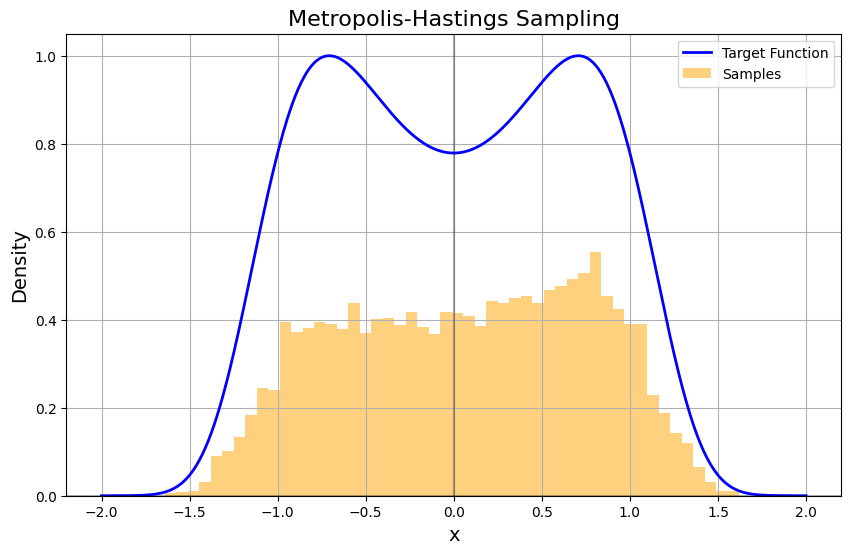

In [25]:
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt

# Define target function (unnormalized density)
def target_function(x):
    val = -x**2 * (x**2 - 1)
    return np.exp(val)

# Symmetric proposal
def propose(current_x):
    return current_x + np.random.normal(loc=0, scale=0.3)

# Proposal density for non-symmetric case
def proposal_density(x_new, x_old, scale=0.3):
    return scipy.stats.norm.pdf(x_new, loc=x_old, scale=scale)

# Metropolis-Hastings algorithm
def metropolis_hastings(iterations, initial_x, symmetric=True):
    burn_in = 1000
    total_iterations = iterations + burn_in

    # Store samples
    samples = np.zeros(total_iterations)
    current_x = initial_x
    accepted = 0

    for i in range(total_iterations):
        proposed_x = propose(current_x)

        # Calculate target densities
        p_current = target_function(current_x)
        p_proposed = target_function(proposed_x)

        if symmetric:
            # For symmetric proposal, the proposal density ratio cancels out
            acceptance_ratio = p_proposed / p_current
        else:
            # For non-symmetric proposal, calculate the full ratio
            q_current_given_proposed = proposal_density(current_x, proposed_x)
            q_proposed_given_current = proposal_density(proposed_x, current_x)
            acceptance_ratio = (p_proposed * q_current_given_proposed) / (p_current * q_proposed_given_current)
        
        acceptance_ratio = min(1, acceptance_ratio)

        # Accept or reject the proposed sample
        if np.random.rand() < acceptance_ratio:
            current_x = proposed_x
            accepted += 1
            
        samples[i] = current_x

    # Discard burn-in samples
    final_samples = samples[burn_in:]

    # Acceptance rate
    acceptance_rate = accepted / total_iterations

    return final_samples, acceptance_rate

# Run the sampler
np.random.seed(42)  # For reproducibility
samples, acceptance_rate = metropolis_hastings(10000, 0.0, symmetric=True)
print(f"Acceptance rate: {acceptance_rate:.2f}")

# Plot the results
x_values = np.linspace(-2.0, 2.0, 1000)
y_values = target_function(x_values)
y_values /= np.max(y_values)  # Normalize for plotting

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, 'b-', lw=2, label='Target Function')
plt.hist(samples, bins=50, density=True, alpha=0.5, color='orange', label='Samples')
plt.title('Metropolis-Hastings Sampling', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='k', linestyle='-', alpha=0.3)
plt.legend()
plt.grid(True)
plt.show()

Acceptance rate: 0.80
Acceptance rate: 0.96
Acceptance rate: 0.80
Acceptance rate: 0.42


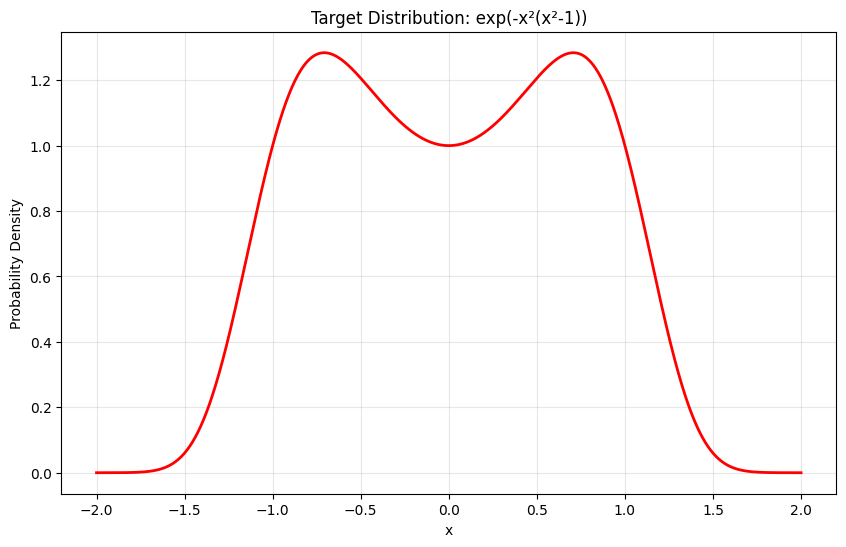

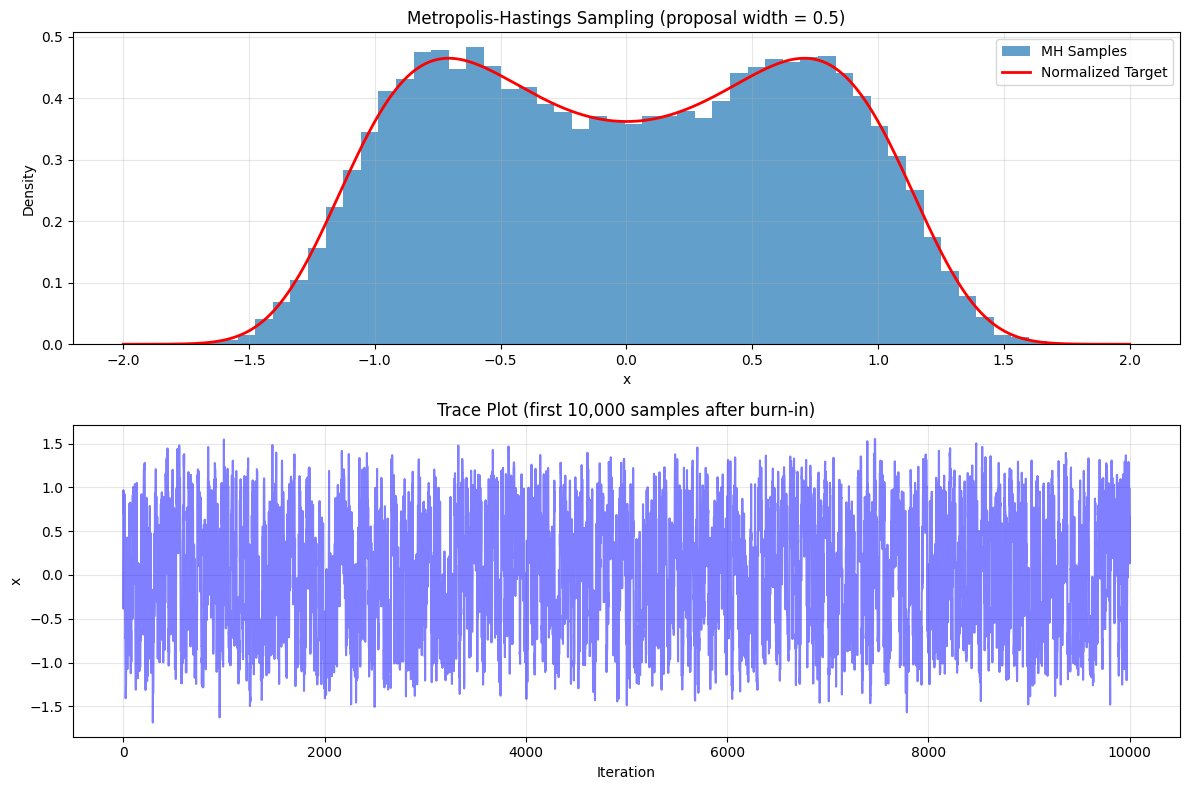

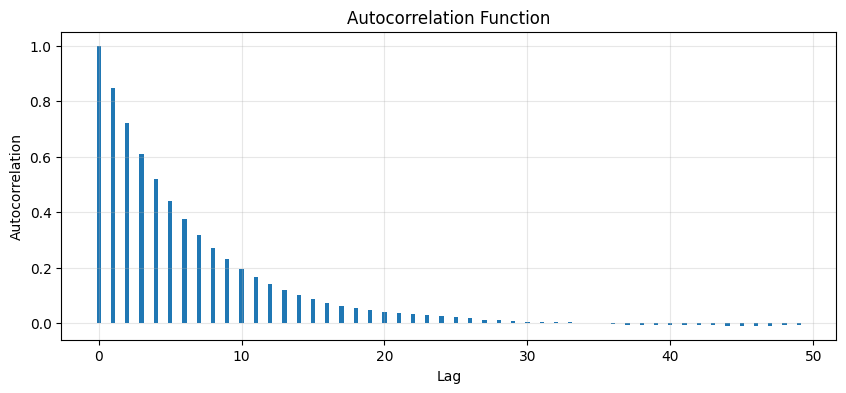

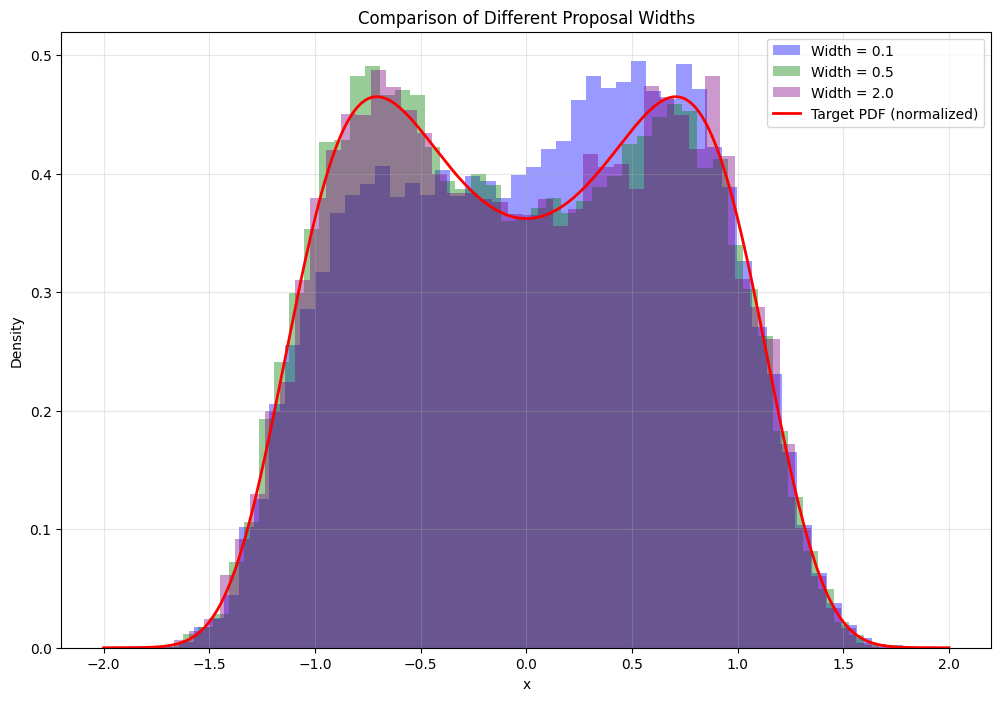

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Target distribution (unnormalized)
def target_pdf(x):
    return np.exp(-x**2 * (x**2 - 1))

# Plot the target distribution
def plot_target_distribution():
    x = np.linspace(-2, 2, 1000)
    y = target_pdf(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'r-', linewidth=2)
    plt.title('Target Distribution: exp(-x²(x²-1))')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True, alpha=0.3)
    return x, y

# Metropolis-Hastings algorithm
def metropolis_hastings(n_samples, proposal_width=0.5):
    # Start at x = 0
    samples = np.zeros(n_samples)
    current_x = 0
    
    # Track acceptance rate
    accepted = 0
    
    for i in range(1, n_samples):
        # Propose new point from Normal distribution centered at current point
        proposed_x = current_x + np.random.normal(0, proposal_width)
        
        # Calculate acceptance probability
        current_density = target_pdf(current_x)
        proposed_density = target_pdf(proposed_x)
        
        # Accept with probability min(1, proposed_density/current_density)
        if current_density == 0:
            acceptance_prob = 1.0
        else:
            acceptance_prob = min(1.0, proposed_density / current_density)
        
        # Accept or reject
        if np.random.uniform(0, 1) < acceptance_prob:
            current_x = proposed_x
            accepted += 1
            
        samples[i] = current_x
    
    acceptance_rate = accepted / (n_samples - 1)
    print(f"Acceptance rate: {acceptance_rate:.2f}")
    
    return samples

# Run the algorithm and visualize results
def run_and_visualize(n_samples=100000, proposal_width=0.5, burn_in=1000):
    # Generate samples
    samples = metropolis_hastings(n_samples, proposal_width)
    
    # Remove burn-in period
    samples = samples[burn_in:]
    
    # Get target distribution for comparison
    x_target, y_target = plot_target_distribution()
    
    # Plot histogram of samples
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.hist(samples, bins=50, density=True, alpha=0.7, label='MH Samples')
    plt.plot(x_target, y_target / np.trapz(y_target, x_target), 'r-', linewidth=2, 
             label='Normalized Target')
    plt.title(f'Metropolis-Hastings Sampling (proposal width = {proposal_width})')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot trace
    plt.subplot(2, 1, 2)
    plt.plot(samples[:min(10000, len(samples))], 'b-', alpha=0.5)
    plt.title('Trace Plot (first 10,000 samples after burn-in)')
    plt.xlabel('Iteration')
    plt.ylabel('x')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Plot autocorrelation
    plt.figure(figsize=(10, 4))
    max_lag = 50
    acf = np.zeros(max_lag)
    mean = np.mean(samples)
    var = np.var(samples)
    
    for lag in range(max_lag):
        acf[lag] = np.mean((samples[:-lag if lag > 0 else None] - mean) * 
                          (samples[lag:] - mean)) / var
    
    plt.bar(range(max_lag), acf, width=0.3)
    plt.title('Autocorrelation Function')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True, alpha=0.3)
    
    return samples

# Execute the algorithm with different proposal widths
np.random.seed(42)

# Run with default settings
samples = run_and_visualize(n_samples=100000, proposal_width=0.5, burn_in=1000)

# Compare with different proposal widths
plt.figure(figsize=(12, 8))
proposal_widths = [0.1, 0.5, 2.0]
colors = ['blue', 'green', 'purple']

for i, width in enumerate(proposal_widths):
    samples = metropolis_hastings(50000, width)
    samples = samples[1000:]  # Remove burn-in
    
    plt.hist(samples, bins=50, density=True, alpha=0.4, 
             label=f'Width = {width}', color=colors[i])

# Plot the target distribution for comparison
x = np.linspace(-2, 2, 1000)
y = target_pdf(x)
norm_const = np.trapz(y, x)
plt.plot(x, y/norm_const, 'r-', linewidth=2, label='Target PDF (normalized)')

plt.title('Comparison of Different Proposal Widths')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Acceptance rate: 0.80
Acceptance rate: 0.77


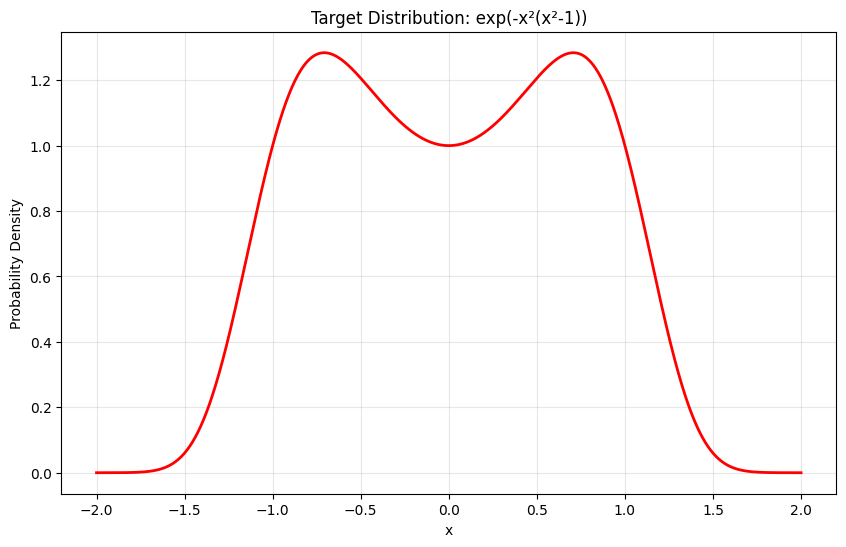

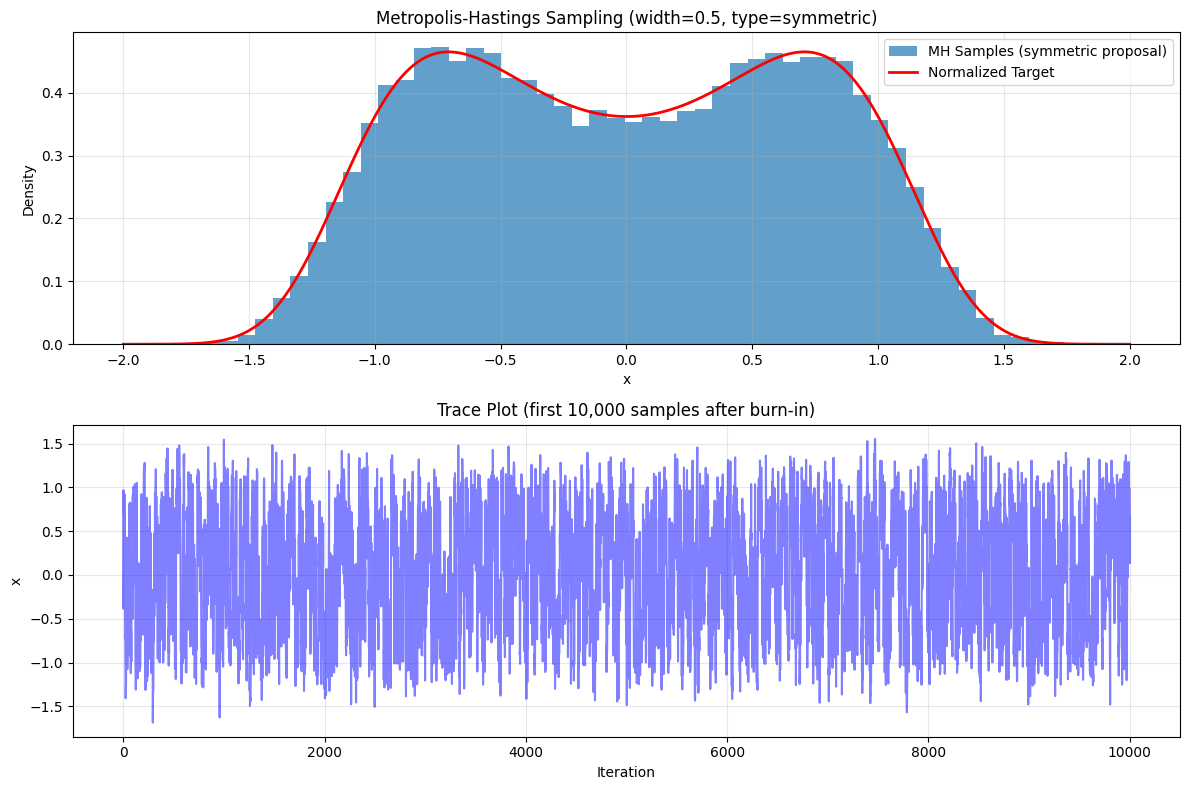

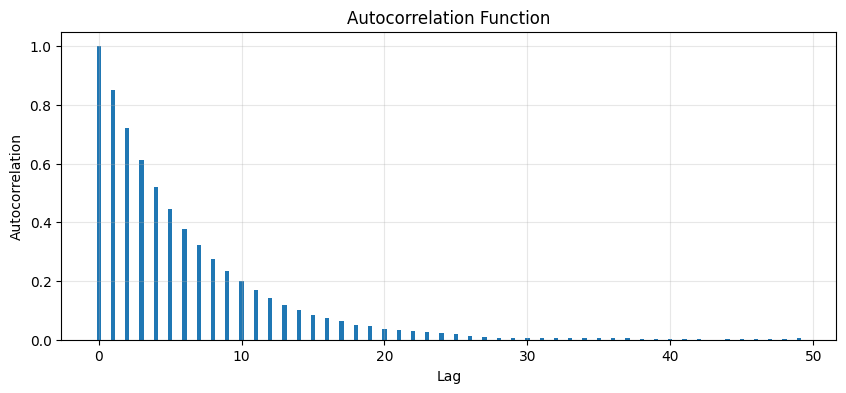

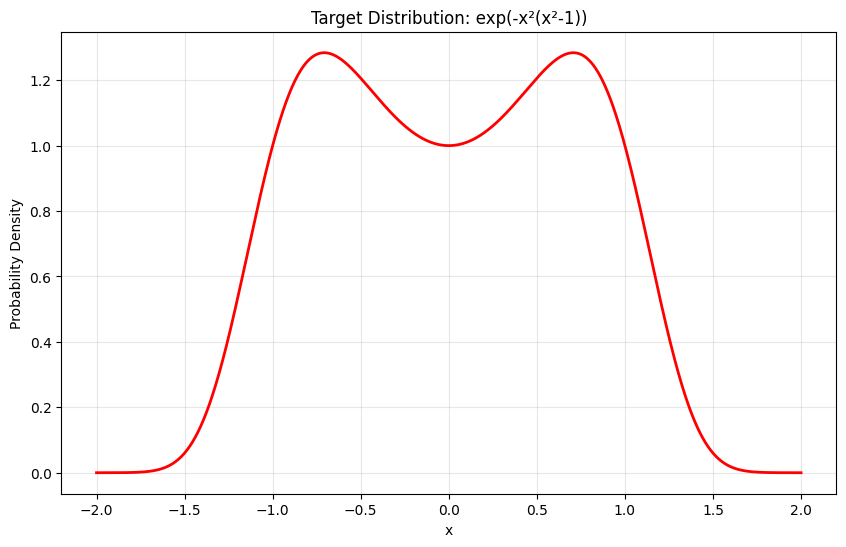

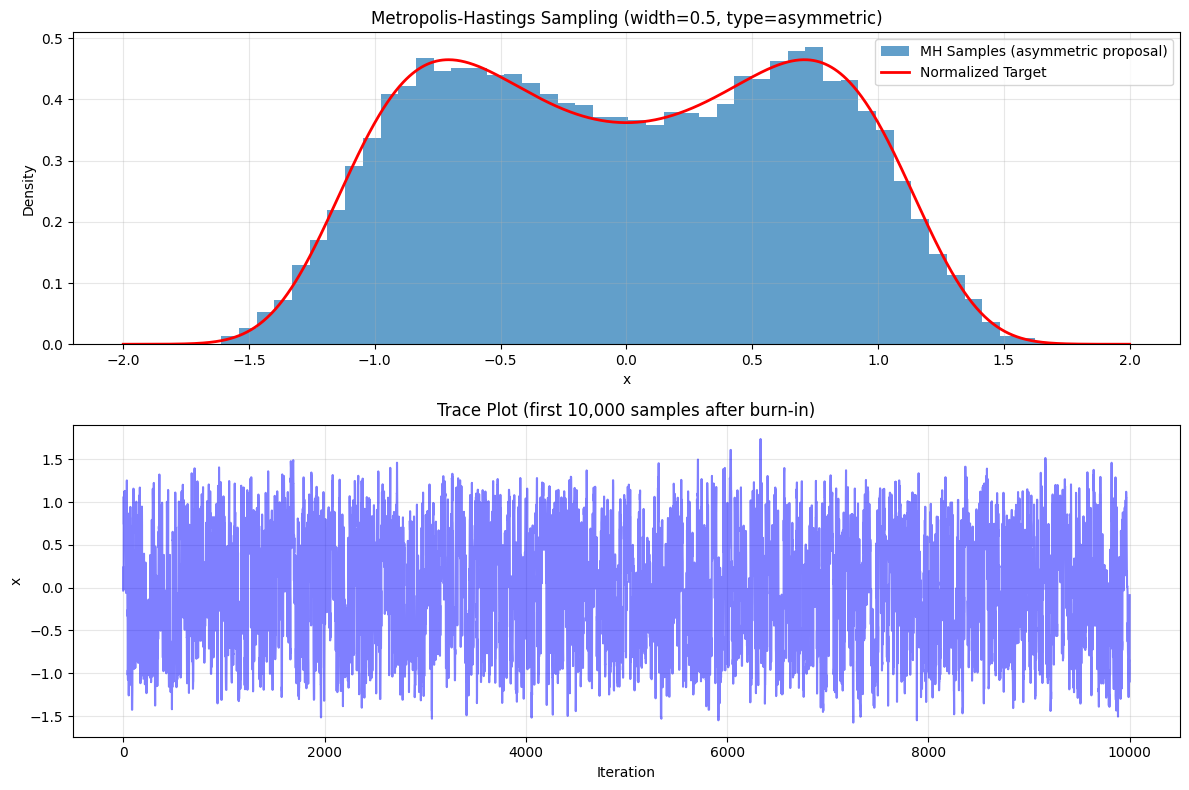

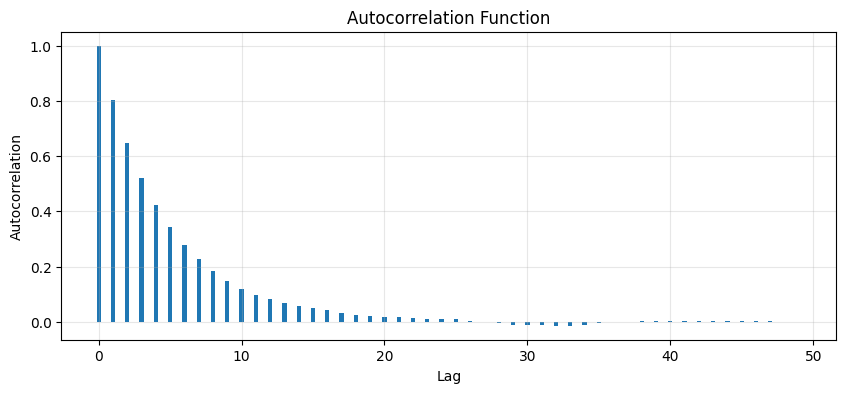

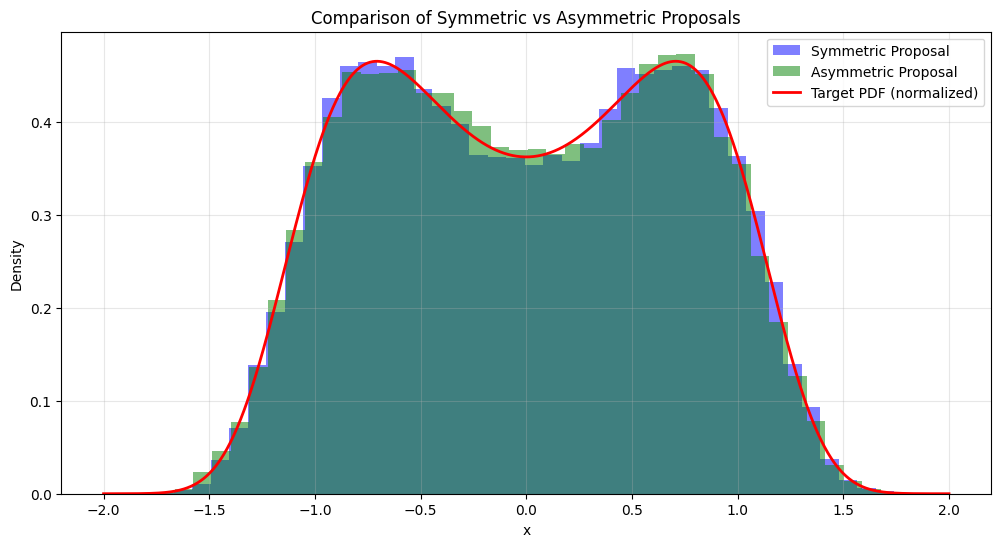

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Target distribution (unnormalized)
def target_pdf(x):
    return np.exp(-x**2 * (x**2 - 1))

# Plot the target distribution
def plot_target_distribution():
    x = np.linspace(-2, 2, 1000)
    y = target_pdf(x)
    
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, 'r-', linewidth=2)
    plt.title('Target Distribution: exp(-x²(x²-1))')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.grid(True, alpha=0.3)
    return x, y

# Full Metropolis-Hastings algorithm with Hastings correction
def metropolis_hastings(n_samples, proposal_type="symmetric", proposal_width=0.5):
    # Start at x = 0
    samples = np.zeros(n_samples)
    current_x = 0
    
    # Track acceptance rate
    accepted = 0
    
    for i in range(1, n_samples):
        # Choose proposal distribution (symmetric or asymmetric)
        if proposal_type == "symmetric":
            # Symmetric proposal (e.g., Gaussian centered at current point)
            proposed_x = current_x + np.random.normal(0, proposal_width)
            
            # For symmetric proposals, q(x'|x) = q(x|x'), so the ratio is 1
            proposal_ratio = 1.0
            
        elif proposal_type == "asymmetric":
            # Example asymmetric proposal: exponential distribution
            # Direction randomly chosen (left or right)
            direction = 1 if np.random.random() < 0.5 else -1
            step = np.random.exponential(scale=proposal_width)
            proposed_x = current_x + direction * step
            
            # Calculate q(x|x') / q(x'|x) - Hastings correction
            # For this example, we need to account for the asymmetry
            # Probability of proposing current_x from proposed_x
            if proposed_x > current_x:
                # We moved right, so we'd need to move left to get back
                q_reverse = 0.5  # 0.5 probability to choose left direction
            else:
                # We moved left, so we'd need to move right to get back
                q_reverse = 0.5  # 0.5 probability to choose right direction
                
            # Probability of the specific step size for each direction
            q_forward = np.exp(-step/proposal_width) / proposal_width
            q_reverse_step = np.exp(-abs(proposed_x - current_x)/proposal_width) / proposal_width
            
            # The full proposal ratio
            proposal_ratio = (q_reverse * q_reverse_step) / (0.5 * q_forward)
            
        else:
            raise ValueError("Unknown proposal type")
        
        # Calculate acceptance probability with Hastings correction
        current_density = target_pdf(current_x)
        proposed_density = target_pdf(proposed_x)
        
        # The full Metropolis-Hastings acceptance probability
        if current_density == 0:
            acceptance_prob = 1.0
        else:
            acceptance_prob = min(1.0, (proposed_density / current_density) * proposal_ratio)
        
        # Accept or reject the proposal
        if np.random.uniform(0, 1) < acceptance_prob:
            current_x = proposed_x
            accepted += 1
            
        samples[i] = current_x
    
    acceptance_rate = accepted / (n_samples - 1)
    print(f"Acceptance rate: {acceptance_rate:.2f}")
    
    return samples

# Run the algorithm and visualize results
def run_and_visualize(n_samples=100000, proposal_type="symmetric", proposal_width=0.5, burn_in=1000):
    # Generate samples
    samples = metropolis_hastings(n_samples, proposal_type, proposal_width)
    
    # Remove burn-in period
    samples = samples[burn_in:]
    
    # Get target distribution for comparison
    x_target, y_target = plot_target_distribution()
    
    # Plot histogram of samples
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 1, 1)
    plt.hist(samples, bins=50, density=True, alpha=0.7, 
             label=f'MH Samples ({proposal_type} proposal)')
    plt.plot(x_target, y_target / np.trapz(y_target, x_target), 'r-', linewidth=2, 
             label='Normalized Target')
    plt.title(f'Metropolis-Hastings Sampling (width={proposal_width}, type={proposal_type})')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Plot trace
    plt.subplot(2, 1, 2)
    plt.plot(samples[:min(10000, len(samples))], 'b-', alpha=0.5)
    plt.title('Trace Plot (first 10,000 samples after burn-in)')
    plt.xlabel('Iteration')
    plt.ylabel('x')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Plot autocorrelation
    plt.figure(figsize=(10, 4))
    max_lag = 50
    acf = np.zeros(max_lag)
    mean = np.mean(samples)
    var = np.var(samples)
    
    for lag in range(max_lag):
        acf[lag] = np.mean((samples[:-lag if lag > 0 else None] - mean) * 
                          (samples[lag:] - mean)) / var
    
    plt.bar(range(max_lag), acf, width=0.3)
    plt.title('Autocorrelation Function')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.grid(True, alpha=0.3)
    
    return samples

# Execute the algorithm with different proposal types
np.random.seed(42)

# Run with symmetric proposal (standard Metropolis)
samples_symmetric = run_and_visualize(n_samples=50000, proposal_type="symmetric", 
                                     proposal_width=0.5, burn_in=1000)

# Run with asymmetric proposal (full Metropolis-Hastings)
samples_asymmetric = run_and_visualize(n_samples=50000, proposal_type="asymmetric", 
                                      proposal_width=0.5, burn_in=1000)

# Compare the results
plt.figure(figsize=(12, 6))
plt.hist(samples_symmetric, bins=40, density=True, alpha=0.5, 
         label='Symmetric Proposal', color='blue')
plt.hist(samples_asymmetric, bins=40, density=True, alpha=0.5, 
         label='Asymmetric Proposal', color='green')

# Plot the target distribution for comparison
x = np.linspace(-2, 2, 1000)
y = target_pdf(x)
norm_const = np.trapz(y, x)
plt.plot(x, y/norm_const, 'r-', linewidth=2, label='Target PDF (normalized)')

plt.title('Comparison of Symmetric vs Asymmetric Proposals')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Acceptance rate: 0.89


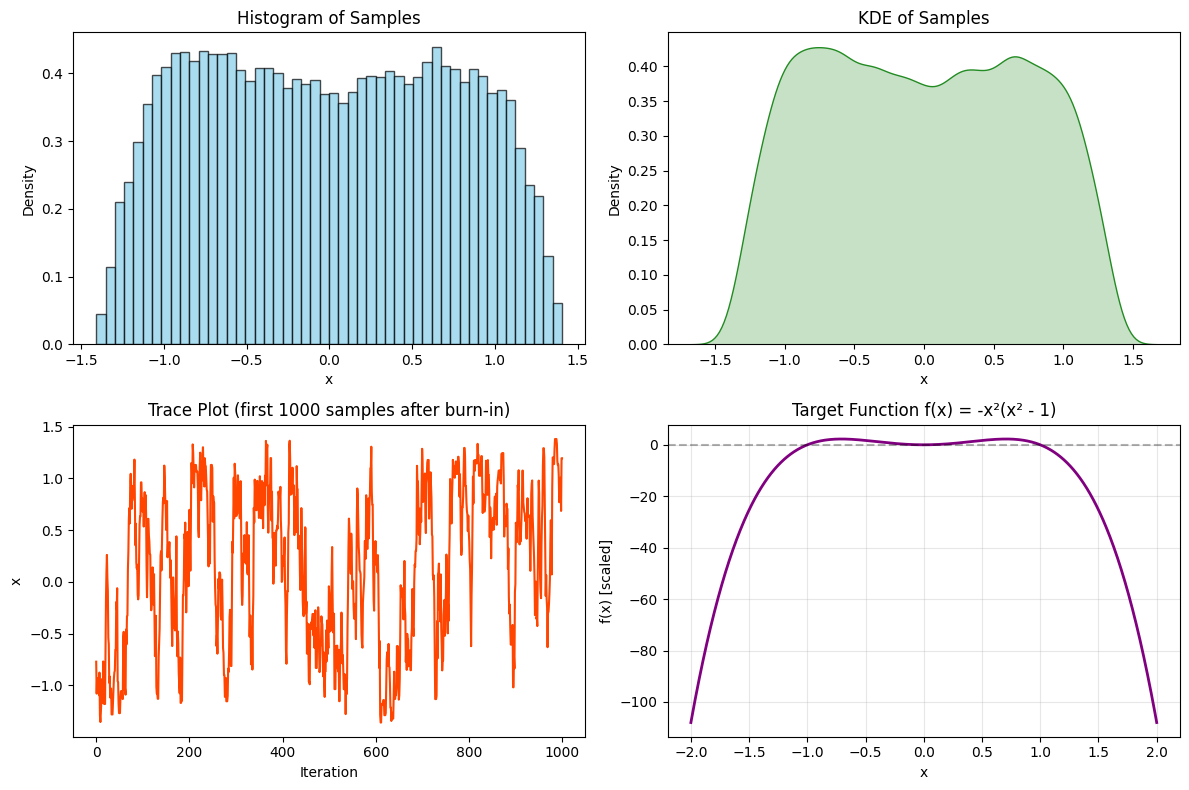

Sample statistics:
Mean: -0.0102
Median: -0.0186
Standard deviation: 0.7327
Min: -1.4095
Max: 1.4059


In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target function
def target_function(x):
    return -x**2 * (x**2 - 1)

# Since we're using the target function as an unnormalized PDF, we need to make sure it's non-negative
# For this particular function, it's already non-negative in the range [-1, 0] and [1, infinity)
# Let's create a proper unnormalized PDF that's proportional to our target
def unnormalized_pdf(x):
    # Add an offset to make all values non-negative
    return target_function(x) + 2  # Adding 2 ensures all values are positive in a reasonable range

# Metropolis-Hastings algorithm
def metropolis_hastings(iterations, proposal_width=0.5, initial_value=0.0):
    # Initialize
    samples = np.zeros(iterations)
    current_x = initial_value
    current_density = unnormalized_pdf(current_x)
    
    acceptance_count = 0
    
    for i in range(iterations):
        # Propose a new value
        proposed_x = current_x + np.random.normal(0, proposal_width)
        proposed_density = unnormalized_pdf(proposed_x)
        
        # Calculate acceptance probability
        if proposed_density <= 0 or current_density <= 0:
            acceptance_ratio = 0
        else:
            acceptance_ratio = proposed_density / current_density
        
        # Accept or reject
        if np.random.uniform(0, 1) < acceptance_ratio:
            current_x = proposed_x
            current_density = proposed_density
            acceptance_count += 1
        
        # Store the sample
        samples[i] = current_x
    
    acceptance_rate = acceptance_count / iterations
    print(f"Acceptance rate: {acceptance_rate:.2f}")
    
    return samples

# Run the Metropolis-Hastings algorithm
np.random.seed(42)  # For reproducibility
samples = metropolis_hastings(50000, proposal_width=0.3)

# Discard the first 10000 samples (burn-in)
samples = samples[10000:]

# Plot the results
plt.figure(figsize=(12, 8))

# Plot 1: Histogram of samples
plt.subplot(2, 2, 1)
plt.hist(samples, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Histogram of Samples')
plt.xlabel('x')
plt.ylabel('Density')

# Plot 2: KDE of samples
plt.subplot(2, 2, 2)
sns.kdeplot(samples, fill=True, color='forestgreen')
plt.title('KDE of Samples')
plt.xlabel('x')
plt.ylabel('Density')

# Plot 3: Trace plot to check convergence
plt.subplot(2, 2, 3)
plt.plot(samples[:1000], color='orangered')
plt.title('Trace Plot (first 1000 samples after burn-in)')
plt.xlabel('Iteration')
plt.ylabel('x')

# Plot 4: Original target function
x_range = np.linspace(-2, 2, 1000)
y_values = target_function(x_range)
norm_factor = np.max(unnormalized_pdf(x_range)) / np.max(y_values)  # Normalization for visualization

plt.subplot(2, 2, 4)
plt.plot(x_range, y_values * norm_factor, color='purple', linewidth=2)
plt.title('Target Function f(x) = -x²(x² - 1)')
plt.xlabel('x')
plt.ylabel('f(x) [scaled]')
plt.axhline(y=0, color='black', linestyle='--', alpha=0.3)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Display some statistics
print("Sample statistics:")
print(f"Mean: {np.mean(samples):.4f}")
print(f"Median: {np.median(samples):.4f}")
print(f"Standard deviation: {np.std(samples):.4f}")
print(f"Min: {np.min(samples):.4f}")
print(f"Max: {np.max(samples):.4f}")